# Lesson 3 Demo 4: Using the WHERE Clause

### In this exercise we are going to walk through the basics of using the WHERE clause in Apache Cassandra.

##### denotes where the code needs to be completed.

Note: __Do not__ click the blue Preview button in the lower task bar

#### We will use a python wrapper/ python driver called cassandra to run the Apache Cassandra queries. This library should be preinstalled but in the future to install this library you can run this command in a notebook to install locally: 
! pip install cassandra-driver
#### More documentation can be found here:  https://datastax.github.io/python-driver/

#### Import Apache Cassandra python package

In [16]:
import cassandra

### First let's create a connection to the database

In [17]:
from cassandra.cluster import Cluster
try: 
    cluster = Cluster(['127.0.0.1']) #If you have a locally installed Apache Cassandra instance
    session = cluster.connect()
except Exception as e:
    print(e)

### Let's create a keyspace to do our work in 

In [18]:
try:
    session.execute("""
    CREATE KEYSPACE IF NOT EXISTS udacity 
    WITH REPLICATION = 
    { 'class' : 'SimpleStrategy', 'replication_factor' : 1 }"""
)

except Exception as e:
    print(e)

#### Connect to our Keyspace. Compare this to how we had to create a new session in PostgreSQL.  

In [19]:
try:
    session.set_keyspace('udacity')
except Exception as e:
    print(e)

### Let's imagine we would like to start creating a new Music Library of albums. 
### We want to ask 4 question of our data
#### 1. Give me every album in my music library that was released in a 1965 year
#### 2. Give me the album that is in my music library that was released in 1965 by "The Beatles"
#### 3. Give me all the albums released in a given year that was made in London 
#### 4. Give me the city that the album "Rubber Soul" was recorded

### Here is our Collection of Data
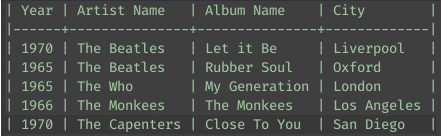

### How should we model this data? What should be our Primary Key and Partition Key? Since our data is looking for the YEAR let's start with that. From there we will add clustering columns on Artist Name and Album Name.

In [20]:
session.execute("DROP TABLE IF EXISTS music_library")
query = """
CREATE TABLE music_library
(year int, artist_name varchar, album_name varchar, city varchar, PRIMARY KEY(year, artist_name, album_name))
"""
try:
    session.execute(query)
except Exception as e:
    print(e)

### Let's insert our data into of table

In [21]:
def insert_album(year, artist_name, album_name, city):
    query = """
    INSERT INTO music_library
    (year, artist_name, album_name, city)
    VALUES (%s, %s, %s, %s)
    """
    try:
        session.execute(query, (year, artist_name, album_name, city))
    except Exception as e:
        print(e)

insert_album(1970, "The Beatles", "Let it Be", "Liverpool")
insert_album(1965, "The Beatles", "Rubber Soul", "Oxford")
insert_album(1964, "The Beatles", "Beatles For Sale", "London")
insert_album(1966, "The Monkees", "The Monkees", "Los Angeles")
insert_album(1970, "The Carpenters", "Close To You", "San Diego")

### Let's Validate our Data Model with our 4 queries.

Query 1: 

In [22]:
query = "select * from music_library WHERE YEAR=1970 AND ARTIST_NAME = 'The Beatles'"
try:
    rows = session.execute(query)
except Exception as e:
    print(e)
    
for row in rows:
    print (row.year, row.artist_name, row.album_name, row.city)

1970 The Beatles Let it Be Liverpool


 Let's try the 2nd query.
 Query 2: 

In [23]:
query = "select * from music_library WHERE YEAR = 1970 AND ARTIST_NAME = 'The Beatles' AND ALBUM_NAME='Let it Be'"

try:
    rows = session.execute(query)
except Exception as e:
    print(e)
    
for row in rows:
    print (row.year, row.artist_name, row.album_name, row.city)

1970 The Beatles Let it Be Liverpool


### Let's try the 3rd query.
Query 3: 

In [24]:
query = "select * from music_library WHERE YEAR = 1970 AND LOCATION = 'Liverpool'"
try:
    rows = session.execute(query)
except Exception as e:
    print(e)
    
for row in rows:
    print (row.year, row.artist_name, row.album_name, row.city)

Error from server: code=2200 [Invalid query] message="Undefined column name location"


### Did you get an error? You can not try to access a column or a clustering column if you have not used the other defined clustering column. Let's see if we can try it a different way. 
Try Query 4: 



In [25]:
query = "select * from music_library WHERE YEAR = 1970 AND ARTIST_NAME='Let it Be'"
try:
    rows = session.execute(query)
except Exception as e:
    print(e)
    
for row in rows:
    print (row.city)

### And Finally close the session and cluster connection

In [26]:
session.shutdown()
cluster.shutdown()